In [1]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg11_bn.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/helper.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/metrics.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/model_blocks.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/trainer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/visualizer.py

--2019-03-30 22:14:36--  https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py [following]
--2019-03-30 22:14:36--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1837 (1.8K) [text/plain]
Saving to: ‘data_loader.py’

data_loader.py      100%[===================>]   1.79K  --.-KB/s    in 0s      

2019-03-30 22:14:36 (78.6 MB/s) - ‘data_loader.py’ saved [1837/1837]

--2019-0

In [2]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data_loader import *
from extractNet_connected_vgg11_bn import *
from helper import *
from metrics import *
from model_blocks import *
from trainer import *
from visualizer import *

In [3]:
!rm -rf __MACOSX
!rm -rf *.zip
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person_vehicle.zip
!unzip data_person_vehicle.zip
!rm -rf __MACOSX
!rm -rf *.zip

--2019-03-30 22:14:47--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/train2014/data_person_vehicle.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/MNRKhan/aps360-project/master/datasets/train2014/data_person_vehicle.zip [following]
--2019-03-30 22:14:47--  https://media.githubusercontent.com/media/MNRKhan/aps360-project/master/datasets/train2014/data_person_vehicle.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141567675 (135M) [application/zip]
Saving to: ‘data_person_vehicle.zip’

data_person_vehicle 100%[===================>] 135.01M  

  inflating: data/images/4405.jpg    
  inflating: data/images/2074.jpg    
  inflating: data/images/9121.jpg    
  inflating: data/images/6212.jpg    
  inflating: data/images/9135.jpg    
  inflating: data/images/6206.jpg    
  inflating: data/images/1569.jpg    
  inflating: data/images/7118.jpg    
  inflating: data/images/4411.jpg    
  inflating: data/images/2060.jpg    
  inflating: data/images/5069.jpg    
  inflating: data/images/2706.jpg    
  inflating: data/images/3418.jpg    
  inflating: data/images/4377.jpg    
  inflating: data/images/943.jpg     
  inflating: data/images/9653.jpg    
  inflating: data/images/6560.jpg    
  inflating: data/images/5041.jpg    
  inflating: data/images/3430.jpg    
  inflating: data/images/7656.jpg    
  inflating: data/images/8565.jpg    
  inflating: data/images/1227.jpg    
  inflating: data/images/6548.jpg    
  inflating: data/images/1541.jpg    
  inflating: data/images/7130.jpg    
  inflating: data/images/8203.jpg    
  inflating:

  inflating: data/images/4000.jpg    
  inflating: data/images/2471.jpg    
  inflating: data/images/9524.jpg    
  inflating: data/images/6617.jpg    
  inflating: data/images/1178.jpg    
  inflating: data/images/7509.jpg    
  inflating: data/images/9242.jpg    
  inflating: data/images/6171.jpg    
  inflating: data/images/5478.jpg    
  inflating: data/images/2317.jpg    
  inflating: data/images/3009.jpg    
  inflating: data/images/4766.jpg    
  inflating: data/images/2303.jpg    
  inflating: data/images/4772.jpg    
  inflating: data/images/8148.jpg    
  inflating: data/images/9256.jpg    
  inflating: data/images/6165.jpg    
  inflating: data/images/9530.jpg    
  inflating: data/images/6603.jpg    
  inflating: data/images/4014.jpg    
  inflating: data/images/2465.jpg    
  inflating: data/images/5685.jpg    
  inflating: data/images/7092.jpg    
  inflating: data/images/177.jpg     
  inflating: data/images/1385.jpg    
  inflating: data/images/611.jpg     
  inflating:

  inflating: data/images/1026.jpg    
  inflating: data/images/6991.jpg    
  inflating: data/images/7457.jpg    
  inflating: data/images/8764.jpg    
  inflating: data/images/3631.jpg    
  inflating: data/images/5240.jpg    
  inflating: data/images/5526.jpg    
  inflating: data/images/2249.jpg    
  inflating: data/images/3157.jpg    
  inflating: data/images/4638.jpg    
  inflating: data/images/7331.jpg    
  inflating: data/images/8002.jpg    
  inflating: data/images/1998.jpg    
  inflating: data/images/1740.jpg    
  inflating: data/images/1973.jpg    
  inflating: data/images/3802.jpg    
  inflating: data/images/9491.jpg    
  inflating: data/images/8957.jpg    
  inflating: data/images/559.jpg     
  inflating: data/images/9485.jpg    
  inflating: data/images/8943.jpg    
  inflating: data/images/3816.jpg    
  inflating: data/images/1967.jpg    
  inflating: data/images/3180.jpg    
  inflating: data/images/4837.jpg    
  inflating: data/images/1797.jpg    
  inflating:

  inflating: data/images/1184.jpg    
  inflating: data/images/3963.jpg    
  inflating: data/images/8836.jpg    
  inflating: data/images/438.jpg     
  inflating: data/images/9296.jpg    
  inflating: data/images/8188.jpg    
  inflating: data/images/1812.jpg    
  inflating: data/images/9282.jpg    
  inflating: data/images/1806.jpg    
  inflating: data/images/8822.jpg    
  inflating: data/images/3977.jpg    
  inflating: data/images/3744.jpg    
  inflating: data/images/5335.jpg    
  inflating: data/images/1153.jpg    
  inflating: data/images/8611.jpg    
  inflating: data/images/7522.jpg    
  inflating: data/images/8177.jpg    
  inflating: data/images/7244.jpg    
  inflating: data/images/1635.jpg    
  inflating: data/images/9269.jpg    
  inflating: data/images/5453.jpg    
  inflating: data/images/4995.jpg    
  inflating: data/images/3022.jpg    
  inflating: data/images/5447.jpg    
  inflating: data/images/4981.jpg    
  inflating: data/images/2328.jpg    
  inflating:

  inflating: data/images/8826.jpg    
  inflating: data/images/428.jpg     
  inflating: data/images/8198.jpg    
  inflating: data/images/1802.jpg    
  inflating: data/images/9286.jpg    
  inflating: data/images/1816.jpg    
  inflating: data/images/9292.jpg    
  inflating: data/images/8832.jpg    
  inflating: data/images/3967.jpg    
  inflating: data/images/3620.jpg    
  inflating: data/images/5251.jpg    
  inflating: data/images/1037.jpg    
  inflating: data/images/6758.jpg    
  inflating: data/images/7446.jpg    
  inflating: data/images/8775.jpg    
  inflating: data/images/6980.jpg    
  inflating: data/images/7320.jpg    
  inflating: data/images/8013.jpg    
  inflating: data/images/1989.jpg    
  inflating: data/images/1751.jpg    
  inflating: data/images/2258.jpg    
  inflating: data/images/5537.jpg    
  inflating: data/images/4629.jpg    
  inflating: data/images/3146.jpg    
  inflating: data/images/5523.jpg    
  inflating: data/images/3152.jpg    
  inflating:

  inflating: data/images/2265.jpg    
  inflating: data/images/1744.jpg    
  inflating: data/images/9318.jpg    
  inflating: data/images/8006.jpg    
  inflating: data/images/7335.jpg    
  inflating: data/images/3153.jpg    
  inflating: data/images/5522.jpg    
  inflating: data/images/5244.jpg    
  inflating: data/images/3635.jpg    
  inflating: data/images/6995.jpg    
  inflating: data/images/8760.jpg    
  inflating: data/images/7453.jpg    
  inflating: data/images/1022.jpg    
  inflating: data/images/6981.jpg    
  inflating: data/images/8774.jpg    
  inflating: data/images/7447.jpg    
  inflating: data/images/6759.jpg    
  inflating: data/images/1036.jpg    
  inflating: data/images/5250.jpg    
  inflating: data/images/3621.jpg    
  inflating: data/images/3147.jpg    
  inflating: data/images/4628.jpg    
  inflating: data/images/5536.jpg    
  inflating: data/images/2259.jpg    
  inflating: data/images/1750.jpg    
  inflating: data/images/8012.jpg    
  inflating:

  inflating: data/images/2449.jpg    
  inflating: data/images/5326.jpg    
  inflating: data/images/4038.jpg    
  inflating: data/images/3757.jpg    
  inflating: data/images/8602.jpg    
  inflating: data/images/7531.jpg    
  inflating: data/images/1140.jpg    
  inflating: data/images/2461.jpg    
  inflating: data/images/4010.jpg    
  inflating: data/images/7519.jpg    
  inflating: data/images/6607.jpg    
  inflating: data/images/9534.jpg    
  inflating: data/images/1168.jpg    
  inflating: data/images/6161.jpg    
  inflating: data/images/9252.jpg    
  inflating: data/images/3019.jpg    
  inflating: data/images/4776.jpg    
  inflating: data/images/5468.jpg    
  inflating: data/images/2307.jpg    
  inflating: data/images/4762.jpg    
  inflating: data/images/2313.jpg    
  inflating: data/images/6175.jpg    
  inflating: data/images/9246.jpg    
  inflating: data/images/8158.jpg    
  inflating: data/images/6613.jpg    
  inflating: data/images/9520.jpg    
  inflating:

  inflating: data/images/3352.jpg    
  inflating: data/images/8207.jpg    
  inflating: data/images/7134.jpg    
  inflating: data/images/9119.jpg    
  inflating: data/images/1545.jpg    
  inflating: data/images/1223.jpg    
  inflating: data/images/8561.jpg    
  inflating: data/images/7652.jpg    
  inflating: data/images/3434.jpg    
  inflating: data/images/5045.jpg    
  inflating: data/images/1974.jpg    
  inflating: data/images/238.jpg     
  inflating: data/images/9496.jpg    
  inflating: data/images/8950.jpg    
  inflating: data/images/8788.jpg    
  inflating: data/images/3805.jpg    
  inflating: data/images/3811.jpg    
  inflating: data/images/9482.jpg    
  inflating: data/images/8944.jpg    
  inflating: data/images/6969.jpg    
  inflating: data/images/1960.jpg    
  inflating: data/images/4818.jpg    
  inflating: data/images/1948.jpg    
  inflating: data/images/204.jpg     
  inflating: data/images/1790.jpg    
  inflating: data/images/2299.jpg    
  inflating:

  inflating: data/images/7999.jpg    
  inflating: data/images/8472.jpg    
  inflating: data/images/7741.jpg    
  inflating: data/images/4248.jpg    
  inflating: data/images/3527.jpg    
  inflating: data/images/2639.jpg    
  inflating: data/images/5156.jpg    
  inflating: data/images/3533.jpg    
  inflating: data/images/5142.jpg    
  inflating: data/images/9778.jpg    
  inflating: data/images/28.jpg      
  inflating: data/images/1324.jpg    
  inflating: data/images/868.jpg     
  inflating: data/images/8466.jpg    
  inflating: data/images/7755.jpg    
  inflating: data/images/8300.jpg    
  inflating: data/images/7033.jpg    
  inflating: data/images/1442.jpg    
  inflating: data/images/5624.jpg    
  inflating: data/images/3255.jpg    
  inflating: data/images/5817.jpg    
  inflating: data/images/883.jpg     
  inflating: data/images/9793.jpg    
  inflating: data/images/7966.jpg    
  inflating: data/images/8499.jpg    
  inflating: data/images/897.jpg     
  inflating:

  inflating: data/images/3491.jpg    
  inflating: data/images/7807.jpg    
  inflating: data/images/5976.jpg    
  inflating: data/images/9194.jpg    
  inflating: data/images/9180.jpg    
  inflating: data/images/5962.jpg    
  inflating: data/images/7813.jpg    
  inflating: data/images/1251.jpg    
  inflating: data/images/7620.jpg    
  inflating: data/images/8513.jpg    
  inflating: data/images/2980.jpg    
  inflating: data/images/4329.jpg    
  inflating: data/images/3446.jpg    
  inflating: data/images/2758.jpg    
  inflating: data/images/5037.jpg    
  inflating: data/images/5751.jpg    
  inflating: data/images/3320.jpg    
  inflating: data/images/5989.jpg    
  inflating: data/images/7146.jpg    
  inflating: data/images/8275.jpg    
  inflating: data/images/1537.jpg    
  inflating: data/images/6258.jpg    
  inflating: data/images/7152.jpg    
  inflating: data/images/8261.jpg    
  inflating: data/images/1523.jpg    
  inflating: data/images/5745.jpg    
  inflating:

  inflating: data/images/2174.jpg    
  inflating: data/images/4505.jpg    
  inflating: data/images/9021.jpg    
  inflating: data/images/6312.jpg    
  inflating: data/images/9747.jpg    
  inflating: data/images/6474.jpg    
  inflating: data/images/17.jpg      
  inflating: data/images/8459.jpg    
  inflating: data/images/857.jpg     
  inflating: data/images/4263.jpg    
  inflating: data/images/2612.jpg    
  inflating: data/images/4277.jpg    
  inflating: data/images/3518.jpg    
  inflating: data/images/2606.jpg    
  inflating: data/images/5169.jpg    
  inflating: data/images/9753.jpg    
  inflating: data/images/6460.jpg    
  inflating: data/images/843.jpg     
  inflating: data/images/7018.jpg    
  inflating: data/images/1469.jpg    
  inflating: data/images/9035.jpg    
  inflating: data/images/6306.jpg    
  inflating: data/images/2160.jpg    
  inflating: data/images/4511.jpg    
  inflating: data/images/7030.jpg    
  inflating: data/images/8303.jpg    
  inflating:

  inflating: data/images/1521.jpg    
  inflating: data/images/7150.jpg    
  inflating: data/images/8263.jpg    
  inflating: data/images/8288.jpg    
  inflating: data/images/9196.jpg    
  inflating: data/images/5974.jpg    
  inflating: data/images/738.jpg     
  inflating: data/images/7805.jpg    
  inflating: data/images/9828.jpg    
  inflating: data/images/7811.jpg    
  inflating: data/images/2969.jpg    
  inflating: data/images/5960.jpg    
  inflating: data/images/9182.jpg    
  inflating: data/images/5790.jpg    
  inflating: data/images/5948.jpg    
  inflating: data/images/7187.jpg    
  inflating: data/images/6299.jpg    
  inflating: data/images/7839.jpg    
  inflating: data/images/704.jpg     
  inflating: data/images/1290.jpg    
  inflating: data/images/9814.jpg    
  inflating: data/images/3487.jpg    
  inflating: data/images/2941.jpg    
  inflating: data/images/2799.jpg    
  inflating: data/images/3493.jpg    
  inflating: data/images/2955.jpg    
  inflating:

  inflating: data/images/3294.jpg    
  inflating: data/images/2834.jpg    
  inflating: data/images/5183.jpg    
  inflating: data/images/671.jpg     
  inflating: data/images/7794.jpg    
  inflating: data/images/7964.jpg    
  inflating: data/images/659.jpg     
  inflating: data/images/9791.jpg    
  inflating: data/images/881.jpg     
  inflating: data/images/5815.jpg    
  inflating: data/images/5801.jpg    
  inflating: data/images/7970.jpg    
  inflating: data/images/9785.jpg    
  inflating: data/images/895.jpg     
  inflating: data/images/2808.jpg    
  inflating: data/images/5154.jpg    
  inflating: data/images/3525.jpg    
  inflating: data/images/8470.jpg    
  inflating: data/images/7743.jpg    
  inflating: data/images/1332.jpg    
  inflating: data/images/9008.jpg    
  inflating: data/images/1454.jpg    
  inflating: data/images/8316.jpg    
  inflating: data/images/7025.jpg    
  inflating: data/images/3243.jpg    
  inflating: data/images/5632.jpg    
  inflating:

  inflating: data/images/6934.jpg    
  inflating: data/images/517.jpg     
  inflating: data/images/1083.jpg    
  inflating: data/images/8919.jpg    
  inflating: data/images/3694.jpg    
  inflating: data/images/4845.jpg    
  inflating: data/images/5583.jpg    
  inflating: data/images/271.jpg     
  inflating: data/images/7394.jpg    
  inflating: data/images/9391.jpg    
  inflating: data/images/259.jpg     
  inflating: data/images/1915.jpg    
  inflating: data/images/8931.jpg    
  inflating: data/images/3864.jpg    
  inflating: data/images/3870.jpg    
  inflating: data/images/6908.jpg    
  inflating: data/images/8925.jpg    
  inflating: data/images/9385.jpg    
  inflating: data/images/1901.jpg    
  inflating: data/images/4879.jpg    
  inflating: data/images/5030.jpg    
  inflating: data/images/2987.jpg    
  inflating: data/images/3441.jpg    
  inflating: data/images/7627.jpg    
  inflating: data/images/8514.jpg    
  inflating: data/images/6539.jpg    
  inflating:

  inflating: data/images/4924.jpg    
  inflating: data/images/310.jpg     
  inflating: data/images/1684.jpg    
  inflating: data/images/7593.jpg    
  inflating: data/images/6855.jpg    
  inflating: data/images/476.jpg     
  inflating: data/images/8878.jpg    
  inflating: data/images/5384.jpg    
  inflating: data/images/4071.jpg    
  inflating: data/images/2400.jpg    
  inflating: data/images/1109.jpg    
  inflating: data/images/8893.jpg    
  inflating: data/images/9555.jpg    
  inflating: data/images/6666.jpg    
  inflating: data/images/7578.jpg    
  inflating: data/images/9233.jpg    
  inflating: data/images/6100.jpg    
  inflating: data/images/2366.jpg    
  inflating: data/images/5409.jpg    
  inflating: data/images/4717.jpg    
  inflating: data/images/3078.jpg    
  inflating: data/images/2372.jpg    
  inflating: data/images/4703.jpg    
  inflating: data/images/8139.jpg    
  inflating: data/images/9227.jpg    
  inflating: data/images/6114.jpg    
  inflating:

  inflating: data/images/9152.jpg    
  inflating: data/images/6261.jpg    
  inflating: data/images/2007.jpg    
  inflating: data/images/5768.jpg    
  inflating: data/images/4476.jpg    
  inflating: data/images/3319.jpg    
  inflating: data/images/4310.jpg    
  inflating: data/images/2761.jpg    
  inflating: data/images/1268.jpg    
  inflating: data/images/9634.jpg    
  inflating: data/images/6507.jpg    
  inflating: data/images/924.jpg     
  inflating: data/images/7619.jpg    
  inflating: data/images/9620.jpg    
  inflating: data/images/6513.jpg    
  inflating: data/images/930.jpg     
  inflating: data/images/4304.jpg    
  inflating: data/images/2775.jpg    
  inflating: data/images/2013.jpg    
  inflating: data/images/4462.jpg    
  inflating: data/images/8258.jpg    
  inflating: data/images/9146.jpg    
  inflating: data/images/6275.jpg    
  inflating: data/images/5754.jpg    
  inflating: data/images/3325.jpg    
  inflating: data/images/7143.jpg    
  inflating:

  inflating: data/images/3523.jpg    
  inflating: data/images/7745.jpg    
  inflating: data/images/878.jpg     
  inflating: data/images/8476.jpg    
  inflating: data/images/38.jpg      
  inflating: data/images/9768.jpg    
  inflating: data/images/1334.jpg    
  inflating: data/images/1452.jpg    
  inflating: data/images/7023.jpg    
  inflating: data/images/8310.jpg    
  inflating: data/images/3245.jpg    
  inflating: data/images/5634.jpg    
  inflating: data/images/2142.jpg    
  inflating: data/images/4533.jpg    
  inflating: data/images/8309.jpg    
  inflating: data/images/6324.jpg    
  inflating: data/images/9017.jpg    
  inflating: data/images/21.jpg      
  inflating: data/images/6442.jpg    
  inflating: data/images/9771.jpg    
  inflating: data/images/7984.jpg    
  inflating: data/images/861.jpg     
  inflating: data/images/4255.jpg    
  inflating: data/images/2624.jpg    
  inflating: data/images/4241.jpg    
  inflating: data/images/2630.jpg    
  inflating:

  inflating: data/images/7614.jpg    
  inflating: data/images/1265.jpg    
  inflating: data/images/9639.jpg    
  inflating: data/images/8533.jpg    
  inflating: data/images/7600.jpg    
  inflating: data/images/1271.jpg    
  inflating: data/images/5017.jpg    
  inflating: data/images/2778.jpg    
  inflating: data/images/3466.jpg    
  inflating: data/images/4309.jpg    
  inflating: data/images/3300.jpg    
  inflating: data/images/5771.jpg    
  inflating: data/images/6278.jpg    
  inflating: data/images/1517.jpg    
  inflating: data/images/8255.jpg    
  inflating: data/images/7166.jpg    
  inflating: data/images/6293.jpg    
  inflating: data/images/4484.jpg    
  inflating: data/images/5942.jpg    
  inflating: data/images/2793.jpg    
  inflating: data/images/7833.jpg    
  inflating: data/images/7827.jpg    
  inflating: data/images/3499.jpg    
  inflating: data/images/2787.jpg    
  inflating: data/images/4490.jpg    
  inflating: data/images/5956.jpg    
  inflating:

  inflating: data/images/7775.jpg    
  inflating: data/images/8446.jpg    
  inflating: data/images/848.jpg     
  inflating: data/images/690.jpg     
  inflating: data/images/1304.jpg    
  inflating: data/images/9758.jpg    
  inflating: data/images/1462.jpg    
  inflating: data/images/7013.jpg    
  inflating: data/images/8320.jpg    
  inflating: data/images/3275.jpg    
  inflating: data/images/5604.jpg    
  inflating: data/images/3261.jpg    
  inflating: data/images/5610.jpg    
  inflating: data/images/6319.jpg    
  inflating: data/images/1476.jpg    
  inflating: data/images/7007.jpg    
  inflating: data/images/8334.jpg    
  inflating: data/images/7761.jpg    
  inflating: data/images/8452.jpg    
  inflating: data/images/1310.jpg    
  inflating: data/images/684.jpg     
  inflating: data/images/5176.jpg    
  inflating: data/images/2619.jpg    
  inflating: data/images/3507.jpg    
  inflating: data/images/4268.jpg    
  inflating: data/images/874.jpg     
  inflating:

  inflating: data/images/255.jpg     
  inflating: data/images/1919.jpg    
  inflating: data/images/8083.jpg    
  inflating: data/images/4861.jpg    
  inflating: data/images/3868.jpg    
  inflating: data/images/6910.jpg    
  inflating: data/images/533.jpg     
  inflating: data/images/9174.jpg    
  inflating: data/images/6247.jpg    
  inflating: data/images/1528.jpg    
  inflating: data/images/7159.jpg    
  inflating: data/images/4450.jpg    
  inflating: data/images/5996.jpg    
  inflating: data/images/2021.jpg    
  inflating: data/images/5028.jpg    
  inflating: data/images/2747.jpg    
  inflating: data/images/3459.jpg    
  inflating: data/images/4336.jpg    
  inflating: data/images/902.jpg     
  inflating: data/images/9612.jpg    
  inflating: data/images/6521.jpg    
  inflating: data/images/916.jpg     
  inflating: data/images/8518.jpg    
  inflating: data/images/9606.jpg    
  inflating: data/images/6535.jpg    
  inflating: data/images/2753.jpg    
  inflating:

  inflating: data/images/5363.jpg    
  inflating: data/images/5405.jpg    
  inflating: data/images/3074.jpg    
  inflating: data/images/7212.jpg    
  inflating: data/images/8121.jpg    
  inflating: data/images/1663.jpg    
  inflating: data/images/2342.jpg    
  inflating: data/images/4733.jpg    
  inflating: data/images/1893.jpg    
  inflating: data/images/8109.jpg    
  inflating: data/images/9217.jpg    
  inflating: data/images/6124.jpg    
  inflating: data/images/9571.jpg    
  inflating: data/images/6642.jpg    
  inflating: data/images/4055.jpg    
  inflating: data/images/2424.jpg    
  inflating: data/images/4041.jpg    
  inflating: data/images/2430.jpg    
  inflating: data/images/9565.jpg    
  inflating: data/images/6656.jpg    
  inflating: data/images/1139.jpg    
  inflating: data/images/7548.jpg    
  inflating: data/images/1887.jpg    
  inflating: data/images/9203.jpg    
  inflating: data/images/6130.jpg    
  inflating: data/images/5439.jpg    
  inflating:

  inflating: data/images/7376.jpg    
  inflating: data/images/6068.jpg    
  inflating: data/images/1707.jpg    
  inflating: data/images/293.jpg     
  inflating: data/images/2226.jpg    
  inflating: data/images/5549.jpg    
  inflating: data/images/4657.jpg    
  inflating: data/images/3138.jpg    
  inflating: data/images/6040.jpg    
  inflating: data/images/9373.jpg    
  inflating: data/images/1049.jpg    
  inflating: data/images/6726.jpg    
  inflating: data/images/9415.jpg    
  inflating: data/images/7438.jpg    
  inflating: data/images/4131.jpg    
  inflating: data/images/3886.jpg    
  inflating: data/images/2540.jpg    
  inflating: data/images/4125.jpg    
  inflating: data/images/3892.jpg    
  inflating: data/images/2554.jpg    
  inflating: data/images/6732.jpg    
  inflating: data/images/9401.jpg    
  inflating: data/images/8079.jpg    
  inflating: data/images/6054.jpg    
  inflating: data/images/9367.jpg    
  inflating: data/images/2232.jpg    
  inflating:

  inflating: data/images/8736.jpg    
  inflating: data/images/9428.jpg    
  inflating: data/images/1074.jpg    
  inflating: data/images/5212.jpg    
  inflating: data/images/3663.jpg    
  inflating: data/images/3924.jpg    
  inflating: data/images/4093.jpg    
  inflating: data/images/8871.jpg    
  inflating: data/images/6684.jpg    
  inflating: data/images/319.jpg     
  inflating: data/images/1855.jpg    
  inflating: data/images/2384.jpg    
  inflating: data/images/4939.jpg    
  inflating: data/images/2390.jpg    
  inflating: data/images/1699.jpg    
  inflating: data/images/1841.jpg    
  inflating: data/images/6848.jpg    
  inflating: data/images/8865.jpg    
  inflating: data/images/6690.jpg    
  inflating: data/images/5399.jpg    
  inflating: data/images/3930.jpg    
  inflating: data/images/4087.jpg    
  inflating: data/images/8695.jpg    
  inflating: data/images/6860.jpg    
  inflating: data/images/443.jpg     
  inflating: data/images/3918.jpg    
  inflating:

  inflating: data/images/1658.jpg    
  inflating: data/images/9204.jpg    
  inflating: data/images/6137.jpg    
  inflating: data/images/1880.jpg    
  inflating: data/images/7229.jpg    
  inflating: data/images/327.jpg     
  inflating: data/images/4913.jpg    
  inflating: data/images/9589.jpg    
  inflating: data/images/441.jpg     
  inflating: data/images/6862.jpg    
  inflating: data/images/8697.jpg    
  inflating: data/images/455.jpg     
  inflating: data/images/6876.jpg    
  inflating: data/images/8683.jpg    
  inflating: data/images/4907.jpg    
  inflating: data/images/333.jpg     
  inflating: data/images/2386.jpg    
  inflating: data/images/3098.jpg    
  inflating: data/images/1857.jpg    
  inflating: data/images/6686.jpg    
  inflating: data/images/8873.jpg    
  inflating: data/images/7598.jpg    
  inflating: data/images/4091.jpg    
  inflating: data/images/3926.jpg    
  inflating: data/images/4085.jpg    
  inflating: data/images/3932.jpg    
  inflating:

  inflating: data/images/6042.jpg    
  inflating: data/images/9371.jpg    
  inflating: data/images/4655.jpg    
  inflating: data/images/2224.jpg    
  inflating: data/images/4641.jpg    
  inflating: data/images/2230.jpg    
  inflating: data/images/4899.jpg    
  inflating: data/images/1739.jpg    
  inflating: data/images/6056.jpg    
  inflating: data/images/9365.jpg    
  inflating: data/images/7348.jpg    
  inflating: data/images/6730.jpg    
  inflating: data/images/9403.jpg    
  inflating: data/images/2556.jpg    
  inflating: data/images/3890.jpg    
  inflating: data/images/5239.jpg    
  inflating: data/images/4127.jpg    
  inflating: data/images/3648.jpg    
  inflating: data/images/8735.jpg    
  inflating: data/images/7406.jpg    
  inflating: data/images/6718.jpg    
  inflating: data/images/1077.jpg    
  inflating: data/images/5211.jpg    
  inflating: data/images/3660.jpg    
  inflating: data/images/3106.jpg    
  inflating: data/images/4669.jpg    
  inflating:

  inflating: data/images/2445.jpg    
  inflating: data/images/4034.jpg    
  inflating: data/images/3997.jpg    
  inflating: data/images/2451.jpg    
  inflating: data/images/4020.jpg    
  inflating: data/images/7529.jpg    
  inflating: data/images/1158.jpg    
  inflating: data/images/6637.jpg    
  inflating: data/images/9504.jpg    
  inflating: data/images/6151.jpg    
  inflating: data/images/9262.jpg    
  inflating: data/images/4746.jpg    
  inflating: data/images/3029.jpg    
  inflating: data/images/2337.jpg    
  inflating: data/images/5458.jpg    
  inflating: data/images/6179.jpg    
  inflating: data/images/1616.jpg    
  inflating: data/images/382.jpg     
  inflating: data/images/8154.jpg    
  inflating: data/images/7267.jpg    
  inflating: data/images/3001.jpg    
  inflating: data/images/5470.jpg    
  inflating: data/images/5316.jpg    
  inflating: data/images/2479.jpg    
  inflating: data/images/3767.jpg    
  inflating: data/images/4008.jpg    
  inflating:

  inflating: data/images/3376.jpg    
  inflating: data/images/4419.jpg    
  inflating: data/images/7138.jpg    
  inflating: data/images/1549.jpg    
  inflating: data/images/6226.jpg    
  inflating: data/images/9115.jpg    
  inflating: data/images/2040.jpg    
  inflating: data/images/4431.jpg    
  inflating: data/images/4357.jpg    
  inflating: data/images/3438.jpg    
  inflating: data/images/2726.jpg    
  inflating: data/images/5049.jpg    
  inflating: data/images/6540.jpg    
  inflating: data/images/9673.jpg    
  inflating: data/images/7886.jpg    
  inflating: data/images/963.jpg     
  inflating: data/images/6554.jpg    
  inflating: data/images/9667.jpg    
  inflating: data/images/7892.jpg    
  inflating: data/images/977.jpg     
  inflating: data/images/8579.jpg    
  inflating: data/images/4343.jpg    
  inflating: data/images/2732.jpg    
  inflating: data/images/2054.jpg    
  inflating: data/images/4425.jpg    
  inflating: data/images/6232.jpg    
  inflating:

  inflating: data/images/4235.jpg    
  inflating: data/images/2644.jpg    
  inflating: data/images/41.jpg      
  inflating: data/images/6422.jpg    
  inflating: data/images/9711.jpg    
  inflating: data/images/801.jpg     
  inflating: data/images/3572.jpg    
  inflating: data/images/5103.jpg    
  inflating: data/images/9739.jpg    
  inflating: data/images/69.jpg      
  inflating: data/images/1365.jpg    
  inflating: data/images/8427.jpg    
  inflating: data/images/829.jpg     
  inflating: data/images/7714.jpg    
  inflating: data/images/8341.jpg    
  inflating: data/images/7072.jpg    
  inflating: data/images/1403.jpg    
  inflating: data/images/197.jpg     
  inflating: data/images/5665.jpg    
  inflating: data/images/3214.jpg    
  inflating: data/images/5671.jpg    
  inflating: data/images/3200.jpg    
  inflating: data/images/8355.jpg    
  inflating: data/images/7066.jpg    
  inflating: data/images/183.jpg     
  inflating: data/images/1417.jpg    
  inflating:

  inflating: data/images/2916.jpg    
  inflating: data/images/2902.jpg    
  inflating: data/images/9857.jpg    
  inflating: data/images/8591.jpg    
  inflating: data/images/747.jpg     
  inflating: data/images/5923.jpg    
  inflating: data/images/2094.jpg    
  inflating: data/images/4383.jpg    
  inflating: data/images/6594.jpg    
  inflating: data/images/7852.jpg    
  inflating: data/images/6580.jpg    
  inflating: data/images/7846.jpg    
  inflating: data/images/5089.jpg    
  inflating: data/images/4397.jpg    
  inflating: data/images/5937.jpg    
  inflating: data/images/2080.jpg    
  inflating: data/images/1589.jpg    
  inflating: data/images/7113.jpg    
  inflating: data/images/8220.jpg    
  inflating: data/images/1562.jpg    
  inflating: data/images/5704.jpg    
  inflating: data/images/3375.jpg    
  inflating: data/images/3413.jpg    
  inflating: data/images/5062.jpg    
  inflating: data/images/9658.jpg    
  inflating: data/images/1204.jpg    
  inflating:

  inflating: data/images/4234.jpg    
  inflating: data/images/2651.jpg    
  inflating: data/images/4220.jpg    
  inflating: data/images/2889.jpg    
  inflating: data/images/814.jpg     
  inflating: data/images/7729.jpg    
  inflating: data/images/1358.jpg    
  inflating: data/images/9704.jpg    
  inflating: data/images/6437.jpg    
  inflating: data/images/54.jpg      
  inflating: data/images/9062.jpg    
  inflating: data/images/6351.jpg    
  inflating: data/images/4546.jpg    
  inflating: data/images/5880.jpg    
  inflating: data/images/6.jpg       
  inflating: data/images/3229.jpg    
  inflating: data/images/2137.jpg    
  inflating: data/images/5658.jpg    
  inflating: data/images/8344.jpg    
  inflating: data/images/7077.jpg    
  inflating: data/images/6369.jpg    
  inflating: data/images/1406.jpg    
  inflating: data/images/192.jpg     
  inflating: data/images/5660.jpg    
  inflating: data/images/3211.jpg    
  inflating: data/images/3577.jpg    
  inflating:

  inflating: data/images/7659.jpg    
  inflating: data/images/964.jpg     
  inflating: data/images/6547.jpg    
  inflating: data/images/9674.jpg    
  inflating: data/images/7881.jpg    
  inflating: data/images/1228.jpg    
  inflating: data/images/2721.jpg    
  inflating: data/images/4350.jpg    
  inflating: data/images/2735.jpg    
  inflating: data/images/4344.jpg    
  inflating: data/images/970.jpg     
  inflating: data/images/6553.jpg    
  inflating: data/images/9660.jpg    
  inflating: data/images/7895.jpg    
  inflating: data/images/6235.jpg    
  inflating: data/images/9106.jpg    
  inflating: data/images/8218.jpg    
  inflating: data/images/4422.jpg    
  inflating: data/images/2053.jpg    
  inflating: data/images/743.jpg     
  inflating: data/images/9853.jpg    
  inflating: data/images/8595.jpg    
  inflating: data/images/2906.jpg    
  inflating: data/images/2912.jpg    
  inflating: data/images/757.jpg     
  inflating: data/images/9847.jpg    
  inflating:

  inflating: data/images/8386.jpg    
  inflating: data/images/150.jpg     
  inflating: data/images/9098.jpg    
  inflating: data/images/2873.jpg    
  inflating: data/images/636.jpg     
  inflating: data/images/805.jpg     
  inflating: data/images/7738.jpg    
  inflating: data/images/9715.jpg    
  inflating: data/images/6426.jpg    
  inflating: data/images/45.jpg      
  inflating: data/images/1349.jpg    
  inflating: data/images/2640.jpg    
  inflating: data/images/4231.jpg    
  inflating: data/images/2898.jpg    
  inflating: data/images/5891.jpg    
  inflating: data/images/3238.jpg    
  inflating: data/images/4557.jpg    
  inflating: data/images/5649.jpg    
  inflating: data/images/2126.jpg    
  inflating: data/images/9073.jpg    
  inflating: data/images/6340.jpg    
  inflating: data/images/9067.jpg    
  inflating: data/images/6354.jpg    
  inflating: data/images/8379.jpg    
  inflating: data/images/5885.jpg    
  inflating: data/images/3.jpg       
  inflating:

  inflating: data/images/1798.jpg    
  inflating: data/images/1940.jpg    
  inflating: data/images/2291.jpg    
  inflating: data/images/4838.jpg    
  inflating: data/images/2285.jpg    
  inflating: data/images/218.jpg     
  inflating: data/images/1954.jpg    
  inflating: data/images/8970.jpg    
  inflating: data/images/6785.jpg    
  inflating: data/images/3825.jpg    
  inflating: data/images/4192.jpg    
  inflating: data/images/3372.jpg    
  inflating: data/images/5703.jpg    
  inflating: data/images/1565.jpg    
  inflating: data/images/9139.jpg    
  inflating: data/images/7114.jpg    
  inflating: data/images/8227.jpg    
  inflating: data/images/9887.jpg    
  inflating: data/images/7672.jpg    
  inflating: data/images/8541.jpg    
  inflating: data/images/797.jpg     
  inflating: data/images/1203.jpg    
  inflating: data/images/5065.jpg    
  inflating: data/images/3414.jpg    
  inflating: data/images/5071.jpg    
  inflating: data/images/3400.jpg    
  inflating:

  inflating: data/images/2333.jpg    
  inflating: data/images/4742.jpg    
  inflating: data/images/8178.jpg    
  inflating: data/images/9266.jpg    
  inflating: data/images/6155.jpg    
  inflating: data/images/9500.jpg    
  inflating: data/images/6633.jpg    
  inflating: data/images/4024.jpg    
  inflating: data/images/3993.jpg    
  inflating: data/images/2455.jpg    
  inflating: data/images/4030.jpg    
  inflating: data/images/3987.jpg    
  inflating: data/images/2441.jpg    
  inflating: data/images/1148.jpg    
  inflating: data/images/9514.jpg    
  inflating: data/images/6627.jpg    
  inflating: data/images/7539.jpg    
  inflating: data/images/9272.jpg    
  inflating: data/images/6141.jpg    
  inflating: data/images/2327.jpg    
  inflating: data/images/5448.jpg    
  inflating: data/images/4756.jpg    
  inflating: data/images/3039.jpg    
  inflating: data/images/7277.jpg    
  inflating: data/images/8144.jpg    
  inflating: data/images/6169.jpg    
  inflating:

  inflating: data/masks/7173.npy     
  inflating: data/masks/8240.npy     
  inflating: data/masks/1502.npy     
  inflating: data/masks/9638.npy     
  inflating: data/masks/1264.npy     
  inflating: data/masks/7615.npy     
  inflating: data/masks/928.npy      
  inflating: data/masks/8526.npy     
  inflating: data/masks/3473.npy     
  inflating: data/masks/5002.npy     
  inflating: data/masks/4308.npy     
  inflating: data/masks/3467.npy     
  inflating: data/masks/2779.npy     
  inflating: data/masks/5016.npy     
  inflating: data/masks/1270.npy     
  inflating: data/masks/7601.npy     
  inflating: data/masks/8532.npy     
  inflating: data/masks/7167.npy     
  inflating: data/masks/8254.npy     
  inflating: data/masks/1516.npy     
  inflating: data/masks/6279.npy     
  inflating: data/masks/5770.npy     
  inflating: data/masks/3301.npy     
  inflating: data/masks/9162.npy     
  inflating: data/masks/6251.npy     
  inflating: data/masks/5758.npy     
  inflating:

  inflating: data/masks/108.npy      
  inflating: data/masks/1488.npy     
  inflating: data/masks/5836.npy     
  inflating: data/masks/2181.npy     
  inflating: data/masks/5188.npy     
  inflating: data/masks/4296.npy     
  inflating: data/masks/6481.npy     
  inflating: data/masks/7947.npy     
  inflating: data/masks/2817.npy     
  inflating: data/masks/8484.npy     
  inflating: data/masks/652.npy      
  inflating: data/masks/134.npy      
  inflating: data/masks/120.npy      
  inflating: data/masks/8490.npy     
  inflating: data/masks/646.npy      
  inflating: data/masks/2803.npy     
  inflating: data/masks/2744.npy     
  inflating: data/masks/4335.npy     
  inflating: data/masks/901.npy      
  inflating: data/masks/6522.npy     
  inflating: data/masks/9611.npy     
  inflating: data/masks/6244.npy     
  inflating: data/masks/9177.npy     
  inflating: data/masks/8269.npy     
  inflating: data/masks/4453.npy     
  inflating: data/masks/5995.npy     
  inflating:

  inflating: data/masks/7945.npy     
  inflating: data/masks/678.npy      
  inflating: data/masks/6483.npy     
  inflating: data/masks/4294.npy     
  inflating: data/masks/2183.npy     
  inflating: data/masks/5834.npy     
  inflating: data/masks/1461.npy     
  inflating: data/masks/8323.npy     
  inflating: data/masks/7010.npy     
  inflating: data/masks/4519.npy     
  inflating: data/masks/3276.npy     
  inflating: data/masks/2168.npy     
  inflating: data/masks/5607.npy     
  inflating: data/masks/5161.npy     
  inflating: data/masks/3510.npy     
  inflating: data/masks/8445.npy     
  inflating: data/masks/7776.npy     
  inflating: data/masks/1307.npy     
  inflating: data/masks/693.npy      
  inflating: data/masks/6468.npy     
  inflating: data/masks/8451.npy     
  inflating: data/masks/7762.npy     
  inflating: data/masks/687.npy      
  inflating: data/masks/1313.npy     
  inflating: data/masks/5175.npy     
  inflating: data/masks/3504.npy     
  inflating:

  inflating: data/masks/5772.npy     
  inflating: data/masks/9148.npy     
  inflating: data/masks/1514.npy     
  inflating: data/masks/7165.npy     
  inflating: data/masks/8256.npy     
  inflating: data/masks/7603.npy     
  inflating: data/masks/8530.npy     
  inflating: data/masks/1272.npy     
  inflating: data/masks/5014.npy     
  inflating: data/masks/3465.npy     
  inflating: data/masks/2948.npy     
  inflating: data/masks/2790.npy     
  inflating: data/masks/1299.npy     
  inflating: data/masks/7830.npy     
  inflating: data/masks/6290.npy     
  inflating: data/masks/5799.npy     
  inflating: data/masks/4487.npy     
  inflating: data/masks/5941.npy     
  inflating: data/masks/4493.npy     
  inflating: data/masks/5955.npy     
  inflating: data/masks/6284.npy     
  inflating: data/masks/719.npy      
  inflating: data/masks/7824.npy     
  inflating: data/masks/9809.npy     
  inflating: data/masks/2784.npy     
  inflating: data/masks/731.npy      
  inflating:

  inflating: data/masks/7029.npy     
  inflating: data/masks/6323.npy     
  inflating: data/masks/9010.npy     
  inflating: data/masks/4534.npy     
  inflating: data/masks/2145.npy     
  inflating: data/masks/2623.npy     
  inflating: data/masks/4252.npy     
  inflating: data/masks/8468.npy     
  inflating: data/masks/866.npy      
  inflating: data/masks/6445.npy     
  inflating: data/masks/26.npy       
  inflating: data/masks/9776.npy     
  inflating: data/masks/7983.npy     
  inflating: data/masks/5164.npy     
  inflating: data/masks/3515.npy     
  inflating: data/masks/8440.npy     
  inflating: data/masks/7773.npy     
  inflating: data/masks/1302.npy     
  inflating: data/masks/696.npy      
  inflating: data/masks/1464.npy     
  inflating: data/masks/9038.npy     
  inflating: data/masks/8326.npy     
  inflating: data/masks/7015.npy     
  inflating: data/masks/3273.npy     
  inflating: data/masks/5602.npy     
  inflating: data/masks/3267.npy     
  inflating:

  inflating: data/masks/2795.npy     
  inflating: data/masks/708.npy      
  inflating: data/masks/7835.npy     
  inflating: data/masks/9818.npy     
  inflating: data/masks/1288.npy     
  inflating: data/masks/7821.npy     
  inflating: data/masks/2959.npy     
  inflating: data/masks/2781.npy     
  inflating: data/masks/5788.npy     
  inflating: data/masks/5950.npy     
  inflating: data/masks/4496.npy     
  inflating: data/masks/6281.npy     
  inflating: data/masks/1061.npy     
  inflating: data/masks/8723.npy     
  inflating: data/masks/7410.npy     
  inflating: data/masks/3676.npy     
  inflating: data/masks/4119.npy     
  inflating: data/masks/5207.npy     
  inflating: data/masks/2568.npy     
  inflating: data/masks/5561.npy     
  inflating: data/masks/3110.npy     
  inflating: data/masks/8045.npy     
  inflating: data/masks/7376.npy     
  inflating: data/masks/6068.npy     
  inflating: data/masks/293.npy      
  inflating: data/masks/1707.npy     
  inflating:

  inflating: data/masks/454.npy      
  inflating: data/masks/332.npy      
  inflating: data/masks/4906.npy     
  inflating: data/masks/2344.npy     
  inflating: data/masks/4735.npy     
  inflating: data/masks/1895.npy     
  inflating: data/masks/6122.npy     
  inflating: data/masks/9211.npy     
  inflating: data/masks/6644.npy     
  inflating: data/masks/9577.npy     
  inflating: data/masks/8669.npy     
  inflating: data/masks/4053.npy     
  inflating: data/masks/2422.npy     
  inflating: data/masks/3728.npy     
  inflating: data/masks/4047.npy     
  inflating: data/masks/5359.npy     
  inflating: data/masks/2436.npy     
  inflating: data/masks/6650.npy     
  inflating: data/masks/9563.npy     
  inflating: data/masks/6888.npy     
  inflating: data/masks/7228.npy     
  inflating: data/masks/1881.npy     
  inflating: data/masks/6136.npy     
  inflating: data/masks/9205.npy     
  inflating: data/masks/1659.npy     
  inflating: data/masks/2350.npy     
  inflating:

  inflating: data/masks/535.npy      
  inflating: data/masks/3846.npy     
  inflating: data/masks/2580.npy     
  inflating: data/masks/1089.npy     
  inflating: data/masks/8913.npy     
  inflating: data/masks/6080.npy     
  inflating: data/masks/1937.npy     
  inflating: data/masks/4697.npy     
  inflating: data/masks/5589.npy     
  inflating: data/masks/4683.npy     
  inflating: data/masks/6094.npy     
  inflating: data/masks/1923.npy     
  inflating: data/masks/8907.npy     
  inflating: data/masks/509.npy      
  inflating: data/masks/3852.npy     
  inflating: data/masks/2594.npy     
  inflating: data/masks/1978.npy     
  inflating: data/masks/234.npy      
  inflating: data/masks/4800.npy     
  inflating: data/masks/3809.npy     
  inflating: data/masks/552.npy      
  inflating: data/masks/8784.npy     
  inflating: data/masks/6971.npy     
  inflating: data/masks/546.npy      
  inflating: data/masks/8948.npy     
  inflating: data/masks/8790.npy     
  inflating:

  inflating: data/masks/2451.npy     
  inflating: data/masks/4020.npy     
  inflating: data/masks/7529.npy     
  inflating: data/masks/1158.npy     
  inflating: data/masks/6637.npy     
  inflating: data/masks/9504.npy     
  inflating: data/masks/6151.npy     
  inflating: data/masks/9262.npy     
  inflating: data/masks/4746.npy     
  inflating: data/masks/3029.npy     
  inflating: data/masks/2337.npy     
  inflating: data/masks/5458.npy     
  inflating: data/masks/4752.npy     
  inflating: data/masks/2323.npy     
  inflating: data/masks/6145.npy     
  inflating: data/masks/9276.npy     
  inflating: data/masks/8168.npy     
  inflating: data/masks/6623.npy     
  inflating: data/masks/9510.npy     
  inflating: data/masks/3983.npy     
  inflating: data/masks/2445.npy     
  inflating: data/masks/4034.npy     
  inflating: data/masks/8626.npy     
  inflating: data/masks/7515.npy     
  inflating: data/masks/1164.npy     
  inflating: data/masks/9538.npy     
  inflating:

  inflating: data/masks/6782.npy     
  inflating: data/masks/8963.npy     
  inflating: data/masks/6796.npy     
  inflating: data/masks/7488.npy     
  inflating: data/masks/4181.npy     
  inflating: data/masks/3836.npy     
  inflating: data/masks/2296.npy     
  inflating: data/masks/3188.npy     
  inflating: data/masks/1947.npy     
  inflating: data/masks/9328.npy     
  inflating: data/masks/1774.npy     
  inflating: data/masks/8036.npy     
  inflating: data/masks/7305.npy     
  inflating: data/masks/3163.npy     
  inflating: data/masks/5512.npy     
  inflating: data/masks/5274.npy     
  inflating: data/masks/3605.npy     
  inflating: data/masks/8750.npy     
  inflating: data/masks/7463.npy     
  inflating: data/masks/586.npy      
  inflating: data/masks/1012.npy     
  inflating: data/masks/8988.npy     
  inflating: data/masks/8744.npy     
  inflating: data/masks/7477.npy     
  inflating: data/masks/1006.npy     
  inflating: data/masks/592.npy      
  inflating:

  inflating: data/masks/8625.npy     
  inflating: data/masks/1167.npy     
  inflating: data/masks/6608.npy     
  inflating: data/masks/5301.npy     
  inflating: data/masks/3770.npy     
  inflating: data/masks/3943.npy     
  inflating: data/masks/2485.npy     
  inflating: data/masks/8816.npy     
  inflating: data/masks/418.npy      
  inflating: data/masks/1832.npy     
  inflating: data/masks/6185.npy     
  inflating: data/masks/4792.npy     
  inflating: data/masks/5498.npy     
  inflating: data/masks/4786.npy     
  inflating: data/masks/1826.npy     
  inflating: data/masks/6191.npy     
  inflating: data/masks/1198.npy     
  inflating: data/masks/8802.npy     
  inflating: data/masks/3957.npy     
  inflating: data/masks/2491.npy     
  inflating: data/masks/424.npy      
  inflating: data/masks/6807.npy     
  inflating: data/masks/4976.npy     
  inflating: data/masks/8194.npy     
  inflating: data/masks/342.npy      
  inflating: data/masks/8180.npy     
  inflating:

  inflating: data/masks/1003.npy     
  inflating: data/masks/597.npy      
  inflating: data/masks/8999.npy     
  inflating: data/masks/5265.npy     
  inflating: data/masks/3614.npy     
  inflating: data/masks/5932.npy     
  inflating: data/masks/2085.npy     
  inflating: data/masks/7843.npy     
  inflating: data/masks/6585.npy     
  inflating: data/masks/4392.npy     
  inflating: data/masks/5098.npy     
  inflating: data/masks/4386.npy     
  inflating: data/masks/7857.npy     
  inflating: data/masks/6591.npy     
  inflating: data/masks/1598.npy     
  inflating: data/masks/5926.npy     
  inflating: data/masks/2091.npy     
  inflating: data/masks/2907.npy     
  inflating: data/masks/8594.npy     
  inflating: data/masks/9852.npy     
  inflating: data/masks/742.npy      
  inflating: data/masks/8580.npy     
  inflating: data/masks/9846.npy     
  inflating: data/masks/756.npy      
  inflating: data/masks/2913.npy     
  inflating: data/masks/9113.npy     
  inflating:

  inflating: data/masks/7711.npy     
  inflating: data/masks/2899.npy     
  inflating: data/masks/4230.npy     
  inflating: data/masks/2641.npy     
  inflating: data/masks/1348.npy     
  inflating: data/masks/44.npy       
  inflating: data/masks/6427.npy     
  inflating: data/masks/9714.npy     
  inflating: data/masks/7739.npy     
  inflating: data/masks/804.npy      
  inflating: data/masks/6341.npy     
  inflating: data/masks/9072.npy     
  inflating: data/masks/2127.npy     
  inflating: data/masks/5648.npy     
  inflating: data/masks/4556.npy     
  inflating: data/masks/3239.npy     
  inflating: data/masks/5890.npy     
  inflating: data/masks/2133.npy     
  inflating: data/masks/4542.npy     
  inflating: data/masks/5884.npy     
  inflating: data/masks/2.npy        
  inflating: data/masks/8378.npy     
  inflating: data/masks/6355.npy     
  inflating: data/masks/9066.npy     
  inflating: data/masks/6433.npy     
  inflating: data/masks/50.npy       
  inflating:

  inflating: data/masks/1564.npy     
  inflating: data/masks/5702.npy     
  inflating: data/masks/3373.npy     
  inflating: data/masks/3415.npy     
  inflating: data/masks/5064.npy     
  inflating: data/masks/796.npy      
  inflating: data/masks/1202.npy     
  inflating: data/masks/8540.npy     
  inflating: data/masks/7673.npy     
  inflating: data/masks/9886.npy     
  inflating: data/masks/1216.npy     
  inflating: data/masks/782.npy      
  inflating: data/masks/6579.npy     
  inflating: data/masks/8554.npy     
  inflating: data/masks/7667.npy     
  inflating: data/masks/9892.npy     
  inflating: data/masks/3401.npy     
  inflating: data/masks/5070.npy     
  inflating: data/masks/2079.npy     
  inflating: data/masks/5716.npy     
  inflating: data/masks/4408.npy     
  inflating: data/masks/3367.npy     
  inflating: data/masks/8232.npy     
  inflating: data/masks/7101.npy     
  inflating: data/masks/1570.npy     
  inflating: data/masks/6380.npy     
  inflating:

  inflating: data/masks/2871.npy     
  inflating: data/masks/5878.npy     
  inflating: data/masks/152.npy      
  inflating: data/masks/8384.npy     
  inflating: data/masks/146.npy      
  inflating: data/masks/8390.npy     
  inflating: data/masks/2865.npy     
  inflating: data/masks/620.npy      
  inflating: data/masks/2695.npy     
  inflating: data/masks/608.npy      
  inflating: data/masks/7935.npy     
  inflating: data/masks/90.npy       
  inflating: data/masks/6395.npy     
  inflating: data/masks/4582.npy     
  inflating: data/masks/5844.npy     
  inflating: data/masks/4596.npy     
  inflating: data/masks/5850.npy     
  inflating: data/masks/5688.npy     
  inflating: data/masks/6381.npy     
  inflating: data/masks/1388.npy     
  inflating: data/masks/7921.npy     
  inflating: data/masks/84.npy       
  inflating: data/masks/2681.npy     
  inflating: data/masks/2859.npy     
  inflating: data/masks/5071.npy     
  inflating: data/masks/3400.npy     
  inflating:

  inflating: data/masks/8570.npy     
  inflating: data/masks/7643.npy     
  inflating: data/masks/4362.npy     
  inflating: data/masks/2713.npy     
  inflating: data/masks/6575.npy     
  inflating: data/masks/9646.npy     
  inflating: data/masks/956.npy      
  inflating: data/masks/8558.npy     
  inflating: data/masks/6213.npy     
  inflating: data/masks/9120.npy     
  inflating: data/masks/2075.npy     
  inflating: data/masks/4404.npy     
  inflating: data/masks/2061.npy     
  inflating: data/masks/4410.npy     
  inflating: data/masks/7119.npy     
  inflating: data/masks/1568.npy     
  inflating: data/masks/6207.npy     
  inflating: data/masks/9134.npy     
  inflating: data/masks/6561.npy     
  inflating: data/masks/9652.npy     
  inflating: data/masks/942.npy      
  inflating: data/masks/4376.npy     
  inflating: data/masks/3419.npy     
  inflating: data/masks/2707.npy     
  inflating: data/masks/5068.npy     
  inflating: data/masks/3586.npy     
  inflating:

  inflating: data/masks/5653.npy     
  inflating: data/masks/3222.npy     
  inflating: data/masks/5860.npy     
  inflating: data/masks/9082.npy     
  inflating: data/masks/7911.npy     
  inflating: data/masks/2869.npy     
  inflating: data/masks/638.npy      
  inflating: data/masks/7905.npy     
  inflating: data/masks/9096.npy     
  inflating: data/masks/8388.npy     
  inflating: data/masks/5874.npy     
  inflating: data/masks/176.npy      
  inflating: data/masks/7093.npy     
  inflating: data/masks/5684.npy     
  inflating: data/masks/2855.npy     
  inflating: data/masks/3593.npy     
  inflating: data/masks/9900.npy     
  inflating: data/masks/88.npy       
  inflating: data/masks/1384.npy     
  inflating: data/masks/610.npy      
  inflating: data/masks/9914.npy     
  inflating: data/masks/7939.npy     
  inflating: data/masks/604.npy      
  inflating: data/masks/1390.npy     
  inflating: data/masks/2699.npy     
  inflating: data/masks/2841.npy     
  inflating:

  inflating: data/masks/3354.npy     
  inflating: data/masks/7132.npy     
  inflating: data/masks/8201.npy     
  inflating: data/masks/1543.npy     
  inflating: data/masks/9679.npy     
  inflating: data/masks/1225.npy     
  inflating: data/masks/7654.npy     
  inflating: data/masks/8567.npy     
  inflating: data/masks/969.npy      
  inflating: data/masks/3432.npy     
  inflating: data/masks/5043.npy     
  inflating: data/masks/9651.npy     
  inflating: data/masks/6562.npy     
  inflating: data/masks/799.npy      
  inflating: data/masks/9889.npy     
  inflating: data/masks/941.npy      
  inflating: data/masks/4375.npy     
  inflating: data/masks/2704.npy     
  inflating: data/masks/2062.npy     
  inflating: data/masks/4413.npy     
  inflating: data/masks/8229.npy     
  inflating: data/masks/9137.npy     
  inflating: data/masks/6204.npy     
  inflating: data/masks/9123.npy     
  inflating: data/masks/6210.npy     
  inflating: data/masks/5719.npy     
  inflating:

  inflating: data/masks/4228.npy     
  inflating: data/masks/2881.npy     
  inflating: data/masks/3547.npy     
  inflating: data/masks/2659.npy     
  inflating: data/masks/5136.npy     
  inflating: data/masks/1350.npy     
  inflating: data/masks/8412.npy     
  inflating: data/masks/7721.npy     
  inflating: data/masks/9718.npy     
  inflating: data/masks/48.npy       
  inflating: data/masks/1344.npy     
  inflating: data/masks/8406.npy     
  inflating: data/masks/808.npy      
  inflating: data/masks/7735.npy     
  inflating: data/masks/2895.npy     
  inflating: data/masks/3553.npy     
  inflating: data/masks/5122.npy     
  inflating: data/masks/5644.npy     
  inflating: data/masks/3235.npy     
  inflating: data/masks/8360.npy     
  inflating: data/masks/7053.npy     
  inflating: data/masks/1422.npy     
  inflating: data/masks/9095.npy     
  inflating: data/masks/5877.npy     
  inflating: data/masks/7906.npy     
  inflating: data/masks/7912.npy     
  inflating:

  inflating: data/masks/9132.npy     
  inflating: data/masks/6201.npy     
  inflating: data/masks/1208.npy     
  inflating: data/masks/9654.npy     
  inflating: data/masks/6567.npy     
  inflating: data/masks/944.npy      
  inflating: data/masks/7679.npy     
  inflating: data/masks/4370.npy     
  inflating: data/masks/2701.npy     
  inflating: data/masks/4364.npy     
  inflating: data/masks/2715.npy     
  inflating: data/masks/788.npy      
  inflating: data/masks/9640.npy     
  inflating: data/masks/6573.npy     
  inflating: data/masks/950.npy      
  inflating: data/masks/9898.npy     
  inflating: data/masks/8238.npy     
  inflating: data/masks/9126.npy     
  inflating: data/masks/6215.npy     
  inflating: data/masks/2073.npy     
  inflating: data/masks/4402.npy     
  inflating: data/masks/7123.npy     
  inflating: data/masks/8210.npy     
  inflating: data/masks/1552.npy     
  inflating: data/masks/5734.npy     
  inflating: data/masks/3345.npy     
  inflating:

  inflating: data/masks/7730.npy     
  inflating: data/masks/3556.npy     
  inflating: data/masks/4239.npy     
  inflating: data/masks/2890.npy     
  inflating: data/masks/5127.npy     
  inflating: data/masks/2648.npy     
  inflating: data/masks/1369.npy     
  inflating: data/masks/6406.npy     
  inflating: data/masks/65.npy       
  inflating: data/masks/9735.npy     
  inflating: data/masks/7718.npy     
  inflating: data/masks/825.npy      
  inflating: data/masks/4211.npy     
  inflating: data/masks/2660.npy     
  inflating: data/masks/2106.npy     
  inflating: data/masks/5669.npy     
  inflating: data/masks/4577.npy     
  inflating: data/masks/3218.npy     
  inflating: data/masks/6360.npy     
  inflating: data/masks/9053.npy     
  inflating: data/masks/8359.npy     
  inflating: data/masks/6374.npy     
  inflating: data/masks/9047.npy     
  inflating: data/masks/2112.npy     
  inflating: data/masks/4563.npy     
  inflating: data/masks/4205.npy     
  inflating:

  inflating: data/masks/7685.npy     
  inflating: data/masks/9870.npy     
  inflating: data/masks/760.npy      
  inflating: data/masks/5092.npy     
  inflating: data/masks/2925.npy     
  inflating: data/masks/3385.npy     
  inflating: data/masks/1592.npy     
  inflating: data/masks/7108.npy     
  inflating: data/masks/6216.npy     
  inflating: data/masks/9125.npy     
  inflating: data/masks/1579.npy     
  inflating: data/masks/2070.npy     
  inflating: data/masks/4401.npy     
  inflating: data/masks/3408.npy     
  inflating: data/masks/4367.npy     
  inflating: data/masks/5079.npy     
  inflating: data/masks/2716.npy     
  inflating: data/masks/6570.npy     
  inflating: data/masks/9643.npy     
  inflating: data/masks/953.npy      
  inflating: data/masks/6564.npy     
  inflating: data/masks/9657.npy     
  inflating: data/masks/947.npy      
  inflating: data/masks/8549.npy     
  inflating: data/masks/4373.npy     
  inflating: data/masks/2702.npy     
  inflating:

  inflating: data/masks/4548.npy     
  inflating: data/masks/3227.npy     
  inflating: data/masks/8.npy        
  inflating: data/masks/3541.npy     
  inflating: data/masks/2887.npy     
  inflating: data/masks/5130.npy     
  inflating: data/masks/1356.npy     
  inflating: data/masks/6439.npy     
  inflating: data/masks/7727.npy     
  inflating: data/masks/8414.npy     
  inflating: data/masks/3569.npy     
  inflating: data/masks/4206.npy     
  inflating: data/masks/5118.npy     
  inflating: data/masks/2677.npy     
  inflating: data/masks/9722.npy     
  inflating: data/masks/6411.npy     
  inflating: data/masks/72.npy       
  inflating: data/masks/832.npy      
  inflating: data/masks/7069.npy     
  inflating: data/masks/9044.npy     
  inflating: data/masks/6377.npy     
  inflating: data/masks/1418.npy     
  inflating: data/masks/2111.npy     
  inflating: data/masks/4560.npy     
  inflating: data/masks/2105.npy     
  inflating: data/masks/4574.npy     
  inflating:

  inflating: data/masks/712.npy      
  inflating: data/masks/2957.npy     
  inflating: data/masks/3491.npy     
  inflating: data/masks/2943.npy     
  inflating: data/masks/3485.npy     
  inflating: data/masks/9816.npy     
  inflating: data/masks/706.npy      
  inflating: data/masks/1292.npy     
  inflating: data/masks/7185.npy     
  inflating: data/masks/5792.npy     
  inflating: data/masks/9180.npy     
  inflating: data/masks/5962.npy     
  inflating: data/masks/7813.npy     
  inflating: data/masks/7807.npy     
  inflating: data/masks/5976.npy     
  inflating: data/masks/9194.npy     
  inflating: data/masks/7152.npy     
  inflating: data/masks/8261.npy     
  inflating: data/masks/1523.npy     
  inflating: data/masks/5745.npy     
  inflating: data/masks/3334.npy     
  inflating: data/masks/2994.npy     
  inflating: data/masks/3452.npy     
  inflating: data/masks/5023.npy     
  inflating: data/masks/9619.npy     
  inflating: data/masks/1245.npy     
  inflating:

  inflating: data/masks/3533.npy     
  inflating: data/masks/5142.npy     
  inflating: data/masks/9778.npy     
  inflating: data/masks/28.npy       
  inflating: data/masks/1324.npy     
  inflating: data/masks/8466.npy     
  inflating: data/masks/868.npy      
  inflating: data/masks/7755.npy     
  inflating: data/masks/8300.npy     
  inflating: data/masks/7033.npy     
  inflating: data/masks/1442.npy     
  inflating: data/masks/5624.npy     
  inflating: data/masks/3255.npy     
  inflating: data/masks/5630.npy     
  inflating: data/masks/3241.npy     
  inflating: data/masks/8314.npy     
  inflating: data/masks/7027.npy     
  inflating: data/masks/1456.npy     
  inflating: data/masks/6339.npy     
  inflating: data/masks/1330.npy     
  inflating: data/masks/7999.npy     
  inflating: data/masks/8472.npy     
  inflating: data/masks/7741.npy     
  inflating: data/masks/4248.npy     
  inflating: data/masks/3527.npy     
  inflating: data/masks/2639.npy     
  inflating:

  inflating: data/masks/5746.npy     
  inflating: data/masks/2029.npy     
  inflating: data/masks/3337.npy     
  inflating: data/masks/4458.npy     
  inflating: data/masks/7179.npy     
  inflating: data/masks/1508.npy     
  inflating: data/masks/6267.npy     
  inflating: data/masks/9154.npy     
  inflating: data/masks/2001.npy     
  inflating: data/masks/4470.npy     
  inflating: data/masks/4316.npy     
  inflating: data/masks/3479.npy     
  inflating: data/masks/2767.npy     
  inflating: data/masks/5008.npy     
  inflating: data/masks/6501.npy     
  inflating: data/masks/9632.npy     
  inflating: data/masks/922.npy      
  inflating: data/masks/6515.npy     
  inflating: data/masks/9626.npy     
  inflating: data/masks/936.npy      
  inflating: data/masks/8538.npy     
  inflating: data/masks/4302.npy     
  inflating: data/masks/2773.npy     
  inflating: data/masks/2015.npy     
  inflating: data/masks/4464.npy     
  inflating: data/masks/6273.npy     
  inflating:

  inflating: data/masks/4288.npy     
  inflating: data/masks/7781.npy     
  inflating: data/masks/7959.npy     
  inflating: data/masks/664.npy      
  inflating: data/masks/102.npy      
  inflating: data/masks/1496.npy     
  inflating: data/masks/3281.npy     
  inflating: data/masks/5828.npy     
  inflating: data/masks/3295.npy     
  inflating: data/masks/1482.npy     
  inflating: data/masks/116.npy      
  inflating: data/masks/7795.npy     
  inflating: data/masks/670.npy      
  inflating: data/masks/5182.npy     
  inflating: data/masks/2835.npy     
  inflating: data/masks/2772.npy     
  inflating: data/masks/4303.npy     
  inflating: data/masks/937.npy      
  inflating: data/masks/8539.npy     
  inflating: data/masks/9627.npy     
  inflating: data/masks/6514.npy     
  inflating: data/masks/9141.npy     
  inflating: data/masks/6272.npy     
  inflating: data/masks/4465.npy     
  inflating: data/masks/2014.npy     
  inflating: data/masks/4471.npy     
  inflating:

  inflating: data/masks/890.npy      
  inflating: data/masks/5804.npy     
  inflating: data/masks/5810.npy     
  inflating: data/masks/2819.npy     
  inflating: data/masks/9794.npy     
  inflating: data/masks/7961.npy     
  inflating: data/masks/884.npy      
  inflating: data/masks/4298.npy     
  inflating: data/masks/2831.npy     
  inflating: data/masks/5186.npy     
  inflating: data/masks/674.npy      
  inflating: data/masks/7949.npy     
  inflating: data/masks/7791.npy     
  inflating: data/masks/112.npy      
  inflating: data/masks/1486.npy     
  inflating: data/masks/5838.npy     
  inflating: data/masks/3291.npy     
  inflating: data/masks/3285.npy     
  inflating: data/masks/1492.npy     
  inflating: data/masks/106.npy      
  inflating: data/masks/660.npy      
  inflating: data/masks/7785.npy     
  inflating: data/masks/2825.npy     
  inflating: data/masks/5192.npy     
  inflating: data/masks/2616.npy     
  inflating: data/masks/5179.npy     
  inflating:

  inflating: data/masks/7627.npy     
  inflating: data/masks/8514.npy     
  inflating: data/masks/6539.npy     
  inflating: data/masks/1256.npy     
  inflating: data/masks/1530.npy     
  inflating: data/masks/7141.npy     
  inflating: data/masks/8272.npy     
  inflating: data/masks/3327.npy     
  inflating: data/masks/4448.npy     
  inflating: data/masks/5756.npy     
  inflating: data/masks/2039.npy     
  inflating: data/masks/1518.npy     
  inflating: data/masks/9144.npy     
  inflating: data/masks/6277.npy     
  inflating: data/masks/7169.npy     
  inflating: data/masks/4460.npy     
  inflating: data/masks/2011.npy     
  inflating: data/masks/2777.npy     
  inflating: data/masks/5018.npy     
  inflating: data/masks/4306.npy     
  inflating: data/masks/3469.npy     
  inflating: data/masks/932.npy      
  inflating: data/masks/9622.npy     
  inflating: data/masks/6511.npy     
  inflating: data/masks/926.npy      
  inflating: data/masks/8528.npy     
  inflating:

  inflating: data/masks/4516.npy     
  inflating: data/masks/5608.npy     
  inflating: data/masks/2167.npy     
  inflating: data/masks/9032.npy     
  inflating: data/masks/6301.npy     
  inflating: data/masks/9026.npy     
  inflating: data/masks/6315.npy     
  inflating: data/masks/8338.npy     
  inflating: data/masks/4502.npy     
  inflating: data/masks/2173.npy     
  inflating: data/masks/2615.npy     
  inflating: data/masks/4264.npy     
  inflating: data/masks/850.npy      
  inflating: data/masks/9740.npy     
  inflating: data/masks/10.npy       
  inflating: data/masks/6473.npy     
  inflating: data/masks/688.npy      
  inflating: data/masks/5152.npy     
  inflating: data/masks/3523.npy     
  inflating: data/masks/7745.npy     
  inflating: data/masks/8476.npy     
  inflating: data/masks/878.npy      
  inflating: data/masks/38.npy       
  inflating: data/masks/9768.npy     
  inflating: data/masks/1334.npy     
  inflating: data/masks/1452.npy     
  inflating:

  inflating: data/masks/1296.npy     
  inflating: data/masks/702.npy      
  inflating: data/masks/9812.npy     
  inflating: data/masks/2947.npy     
  inflating: data/masks/3481.npy     
  inflating: data/masks/2953.npy     
  inflating: data/masks/3495.npy     
  inflating: data/masks/716.npy      
  inflating: data/masks/1282.npy     
  inflating: data/masks/9806.npy     
  inflating: data/masks/7195.npy     
  inflating: data/masks/5782.npy     
  inflating: data/masks/9190.npy     
  inflating: data/masks/5972.npy     
  inflating: data/masks/7803.npy     
  inflating: data/masks/7817.npy     
  inflating: data/masks/5966.npy     
  inflating: data/masks/9184.npy     
  inflating: data/masks/1057.npy     
  inflating: data/masks/6738.npy     
  inflating: data/masks/7426.npy     
  inflating: data/masks/8715.npy     
  inflating: data/masks/3640.npy     
  inflating: data/masks/3898.npy     
  inflating: data/masks/5231.npy     
  inflating: data/masks/2238.npy     
  inflating:

In [4]:
batch_size = 64
lr = 0.001

In [5]:
# Set random seeds
torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("./data", transform, size=1000)

# Dataset sizes
size = len(dataset)
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

batch_size = 64

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader
train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=0)

In [6]:
print("Full data set: ", size)
print("Training size: ", train_size)
print("Validation size: ", valid_size)

Full data set:  1000
Training size:  600
Validation size:  200


In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Model is being trained on:", device)
torch.cuda.empty_cache()

Model is being trained on: cuda:0


In [8]:
model = extractNet_connected_vgg11_bn(act_type="P")
model.to(device)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /home/md_nahian_99/.torch/models/vgg11_bn-6002323d.pth
531503671it [00:06, 79917388.97it/s]


extractNet_connected_vgg11_bn(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

Epoch:0, Train IoU:0.3232, Train Loss:0.0114|Valid IoU:0.3228, Valid Loss:0.0147
Epoch:1, Train IoU:0.5202, Train Loss:0.0104|Valid IoU:0.5257, Valid Loss:0.0132
Epoch:2, Train IoU:0.5562, Train Loss:0.0099|Valid IoU:0.5545, Valid Loss:0.0128
Epoch:3, Train IoU:0.5654, Train Loss:0.0097|Valid IoU:0.5569, Valid Loss:0.0125
Epoch:4, Train IoU:0.5789, Train Loss:0.0097|Valid IoU:0.5676, Valid Loss:0.0125
Epoch:5, Train IoU:0.6094, Train Loss:0.0097|Valid IoU:0.5922, Valid Loss:0.0127
Epoch:6, Train IoU:0.6133, Train Loss:0.0099|Valid IoU:0.5980, Valid Loss:0.0127
Epoch:7, Train IoU:0.6338, Train Loss:0.0094|Valid IoU:0.5999, Valid Loss:0.0123
Epoch:8, Train IoU:0.6731, Train Loss:0.0094|Valid IoU:0.6395, Valid Loss:0.0122
Epoch:9, Train IoU:0.6592, Train Loss:0.0093|Valid IoU:0.6135, Valid Loss:0.0124
Epoch:10, Train IoU:0.6707, Train Loss:0.0093|Valid IoU:0.6115, Valid Loss:0.0123
Epoch:11, Train IoU:0.6968, Train Loss:0.0092|Valid IoU:0.6241, Valid Loss:0.0121
Epoch:12, Train IoU:0.7137

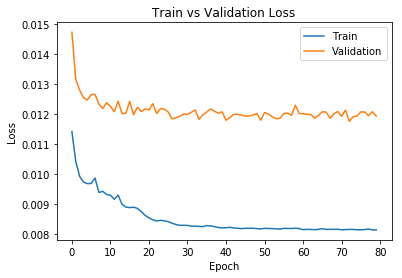

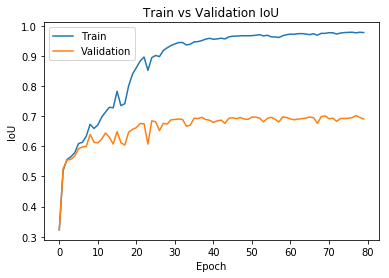

In [9]:
# Train
trainModel(model, train, valid, batch_size=batch_size, lr=lr, num_epochs=80, checkpoint=False, device=device)

In [10]:
model = model.eval()
model.to("cpu")
torch.save(model.state_dict(), "epoch80")
model_state = torch.load("epoch80")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


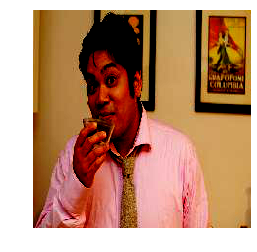

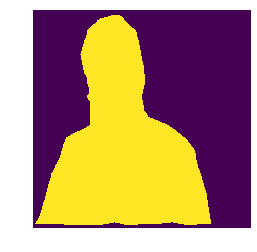

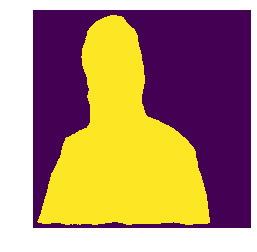

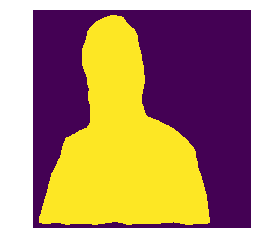

<Figure size 432x288 with 0 Axes>

In [11]:
model.to("cpu")

# After training (train set)
img, target = train_data[-112]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(model(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))
imshow(target)
imshow(out)
imshow(denoised)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


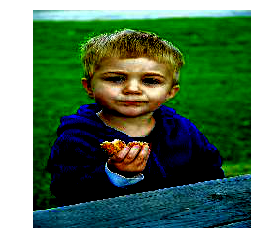

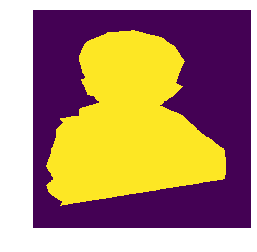

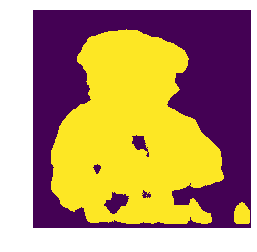

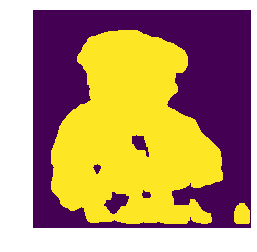

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  del sys.path[0]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


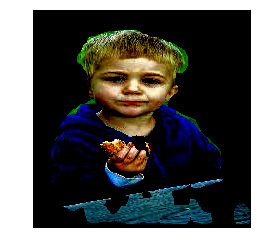

<Figure size 432x288 with 0 Axes>

In [12]:
# After training (validation set)
img, target = valid_data[-2]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(model(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
out = thresholdProbMask(out)
denoised = denoise(out)

imshow(np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))
imshow(target)
imshow(out)
imshow(denoised)
imshow(np.expand_dims(denoised,axis=3)*np.transpose(img.squeeze(0).detach().numpy(), [1,2,0]))